# Plots

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

## Download from Atlas and Load

In [2]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import *

ens_codes = [
    Ensemble('PED00424e001', data_path='C:/Users/nikol/Documents/test_dir/ped/PED00424e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00424e001.top.pdb'),
    Ensemble('PED00423e001', data_path='C:/Users/nikol/Documents/test_dir/ped/PED00423e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00423e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories()

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading trajectory for PED00424e001...
Loading trajectory for PED00423e001...


{'PED00424e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x1e19654ff70>,
 'PED00423e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x1e1967f67a0>}

In [3]:
vis = Visualization(analysis=analysis)

array([<Axes: title={'center': 'Average Distance Map: PED00424e001'}>,
       <Axes: title={'center': 'Average Distance Map: PED00423e001'}>],
      dtype=object)

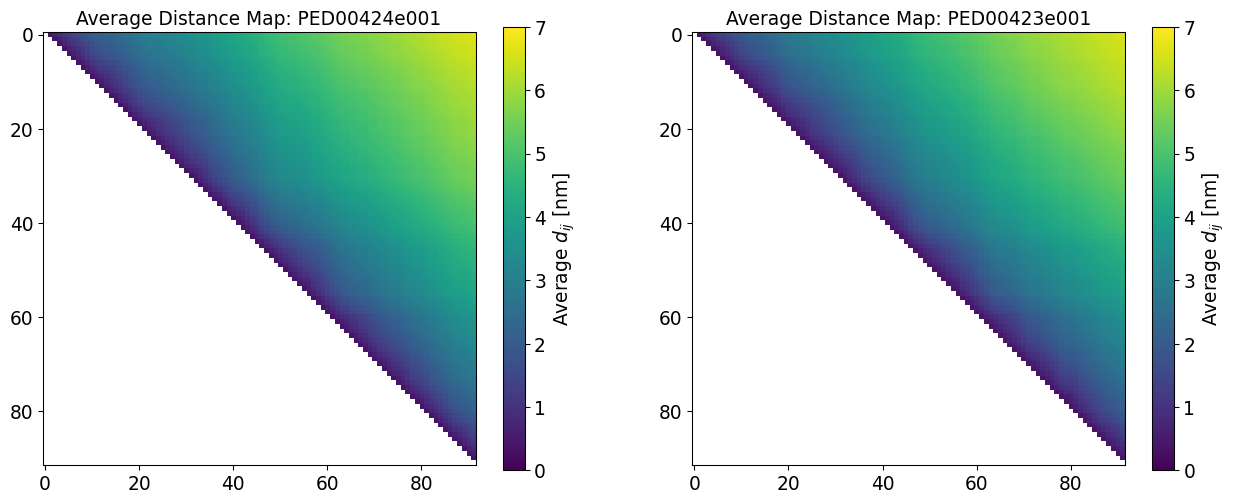

In [4]:
vis.average_distance_maps()

C:\Users\nikol\AppData\Local\Temp\ipykernel_12036\2646377691.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


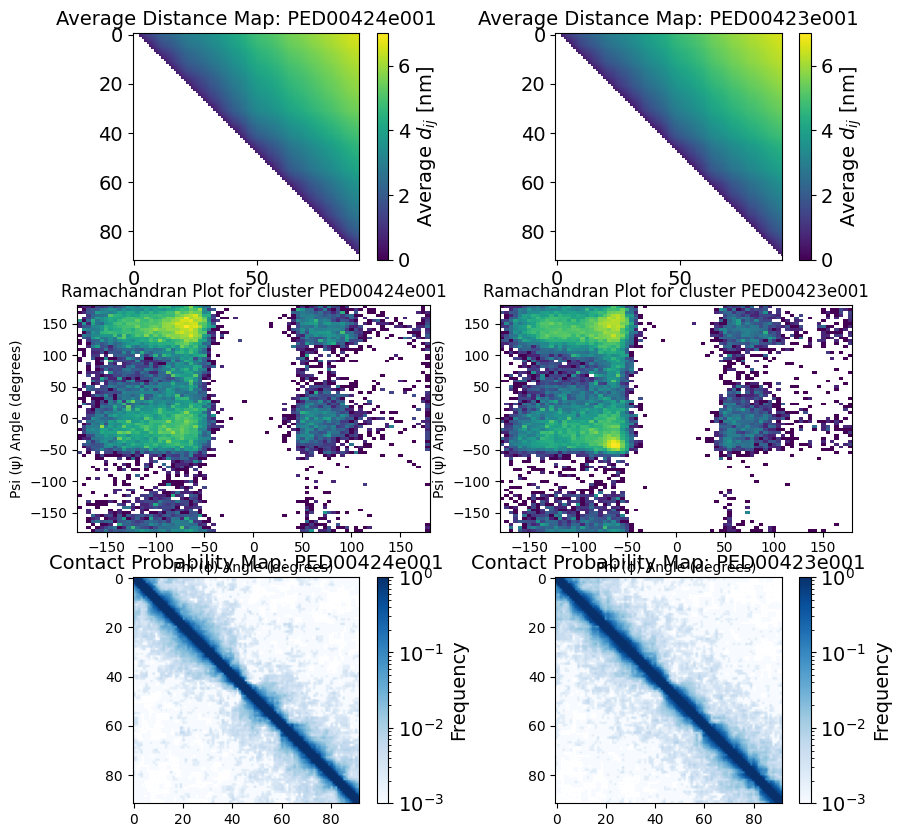

In [8]:

fig, ax = plt.subplots(3, 2, figsize=(10, 10))
vis.average_distance_maps(ax=ax[0])
vis.ramachandran_plots(ax=ax[1], two_d_hist=True)
vis.contact_prob_maps(ax=ax[2])

fig.show()

<Axes: title={'center': 'End-to-End distances distribution'}, xlabel='End-to-End distance [nm]', ylabel='Density'>

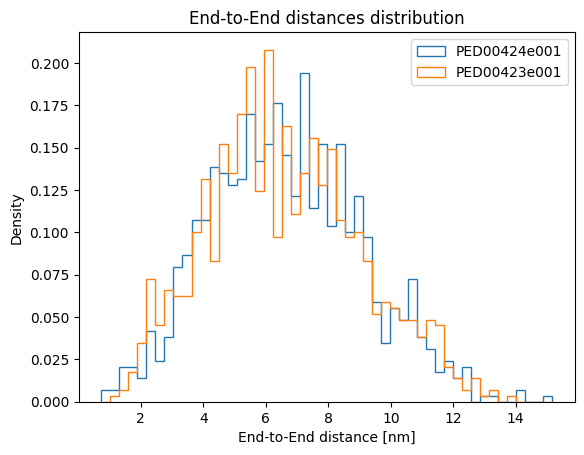

In [6]:
vis.end_to_end_distances(bins=50, violin_plot=False, median=False, means=True)

<Axes: title={'center': 'Asphericity distribution'}, ylabel='Asphericity'>

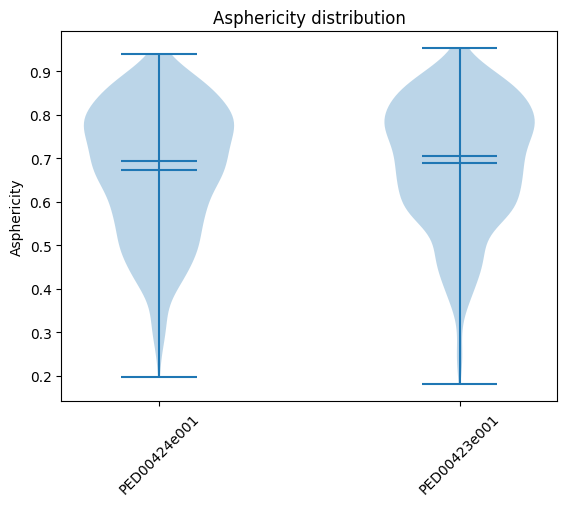

In [7]:
vis.asphericity(bins=10, violin_plot=True)

Pearson coeff for PED00424e001 = 0.767
Pearson coeff for PED00423e001 = 0.767


<Axes: xlabel='Radius of Gyration (Rg) [nm]', ylabel='Asphericity'>

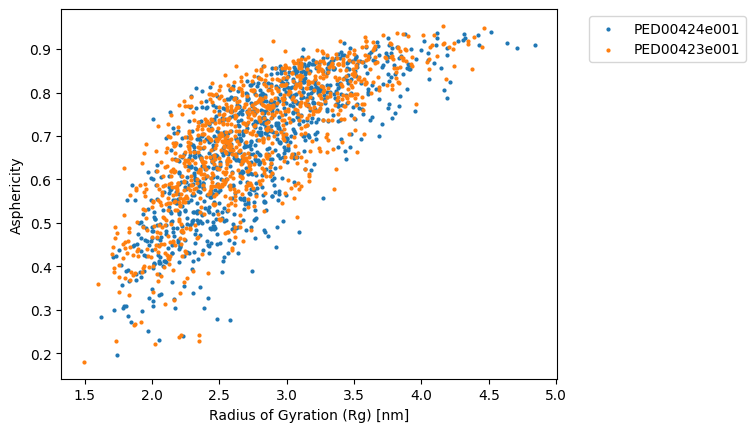

In [8]:
vis.rg_vs_asphericity()

<Axes: title={'center': 'Prolateness distribution'}, ylabel='Prolateness'>

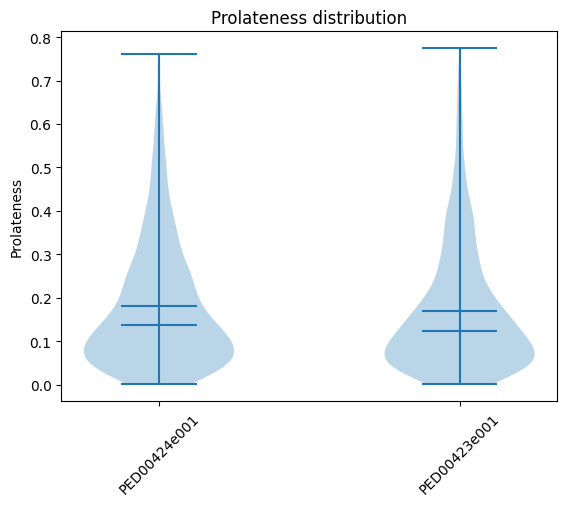

In [9]:
vis.prolateness(bins=10, violin_plot=True, median=True, means=True)

Pearson coeff for PED00424e001 = -0.415
Pearson coeff for PED00423e001 = -0.403


<Axes: xlabel='Radius of Gyration (Rg) [nm]', ylabel='Prolateness'>

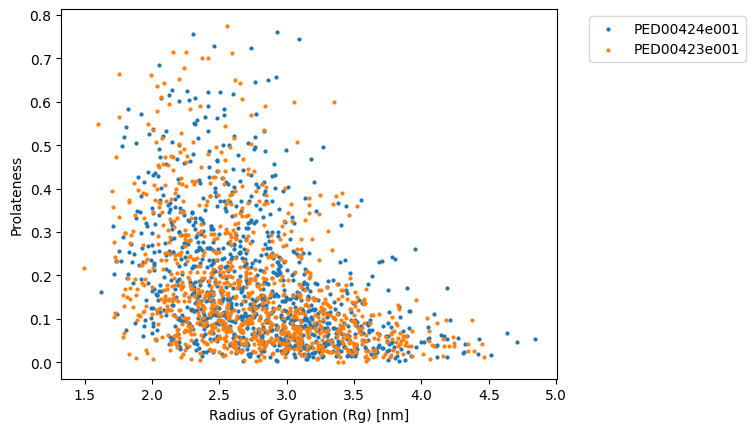

In [10]:
vis.rg_vs_prolateness()

<Axes: title={'center': 'Distribution of alpha angles'}, xlabel='angle [rad]', ylabel='Density'>

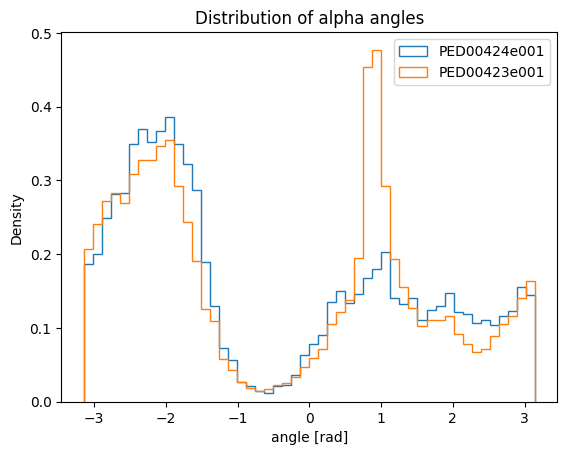

In [11]:
vis.alpha_angles()

<Axes: title={'center': 'Relative Content of H in Each Residue in the ensembles'}, xlabel='Residue Index', ylabel='Relative Content of H (Helix)'>

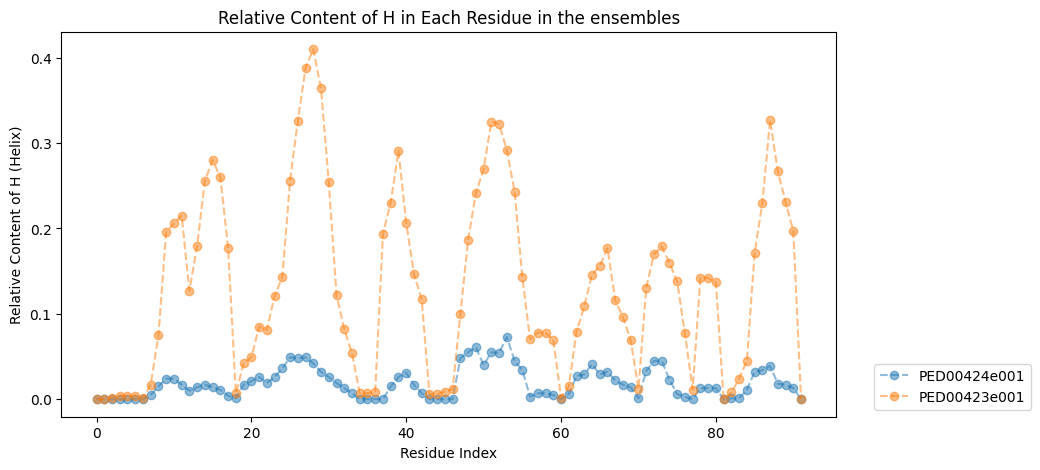

In [12]:
vis.relative_helix_content()

<Axes: title={'center': 'Radius of Gyration'}, xlabel='Radius of Gyration (Rg)', ylabel='Density'>

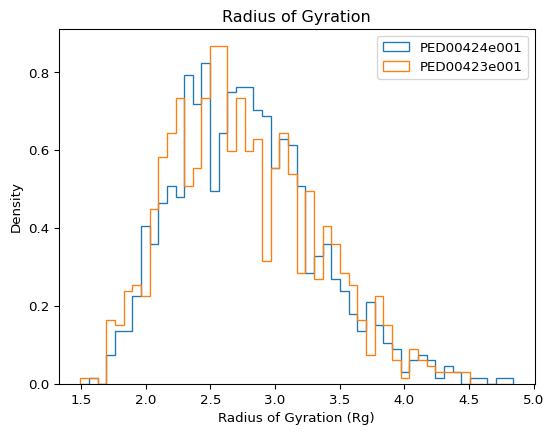

In [21]:
vis.radius_of_gyration(multiple_hist_ax=False)

array([<Axes: title={'center': 'Contact Probability Map: PED00424e001'}>,
       <Axes: title={'center': 'Contact Probability Map: PED00423e001'}>],
      dtype=object)

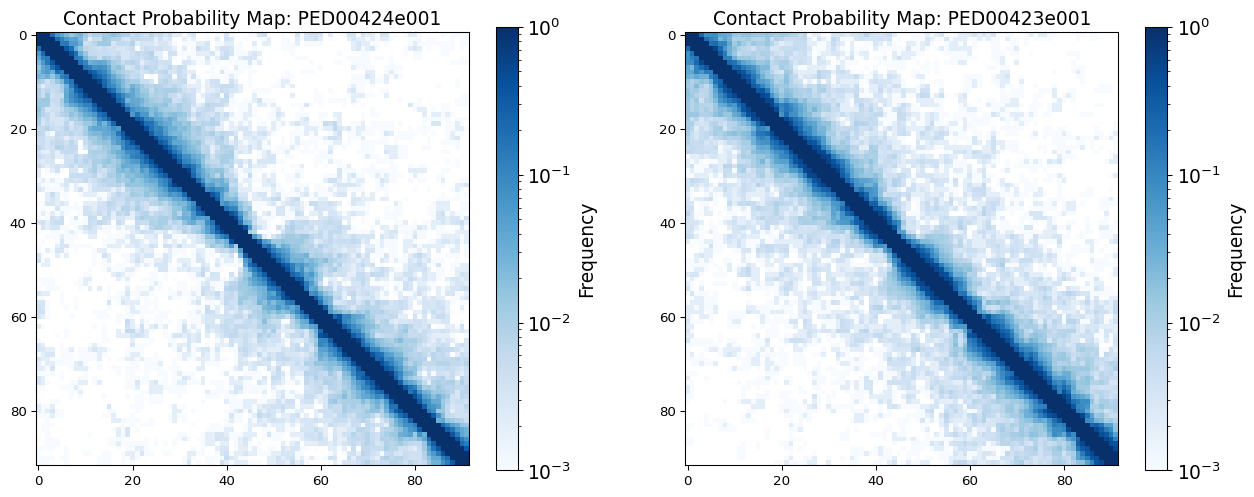

In [14]:
vis.contact_prob_maps(threshold=0.8, min_sep=4, cmap_color='Blues', norm=True)

<Axes: xlabel='Residue Index', ylabel='Site-specific flexibility parameter'>

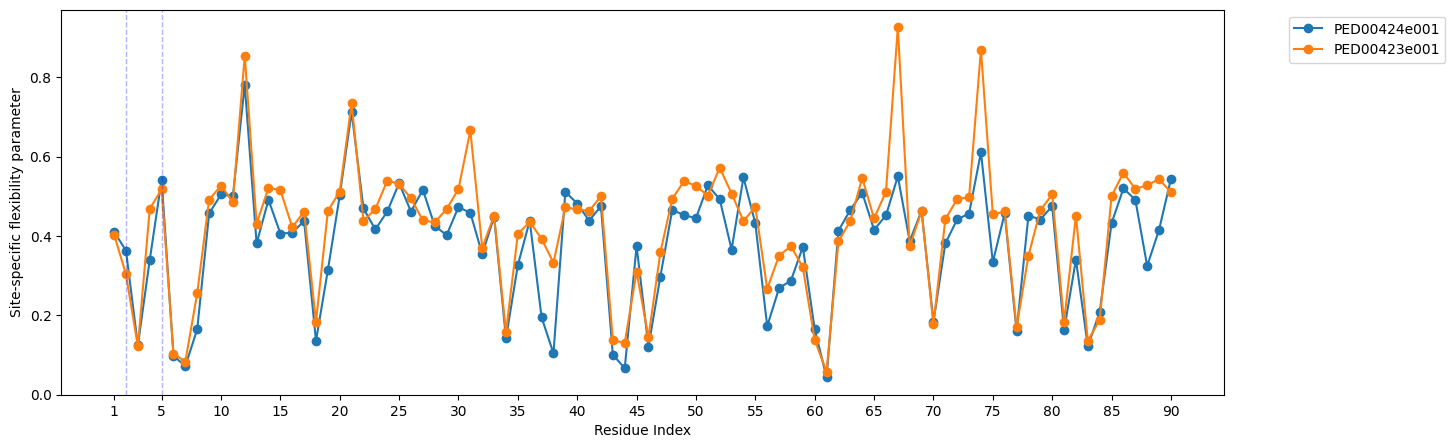

In [15]:
vis.ss_flexibility_parameter(pointer=[2,5])

<Axes: xlabel='Residue Index', ylabel='Site-specific order parameter'>

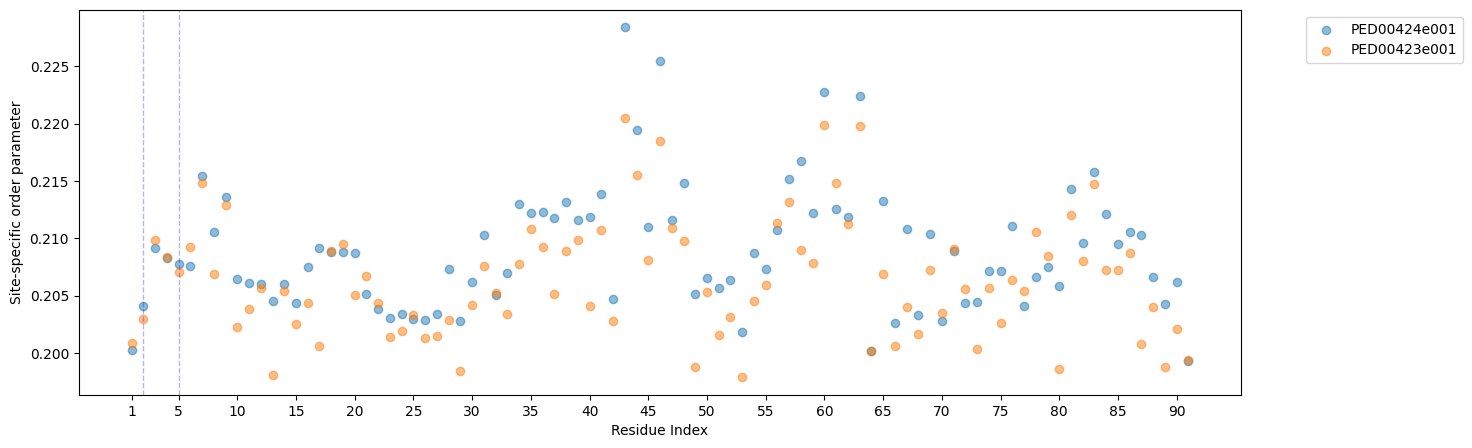

In [16]:
vis.ss_order_parameter(pointer=[5,2])

<Axes: title={'center': 'Mean SASA for Each Residue in Ensembles'}, xlabel='Residue Index', ylabel='Mean SASA'>

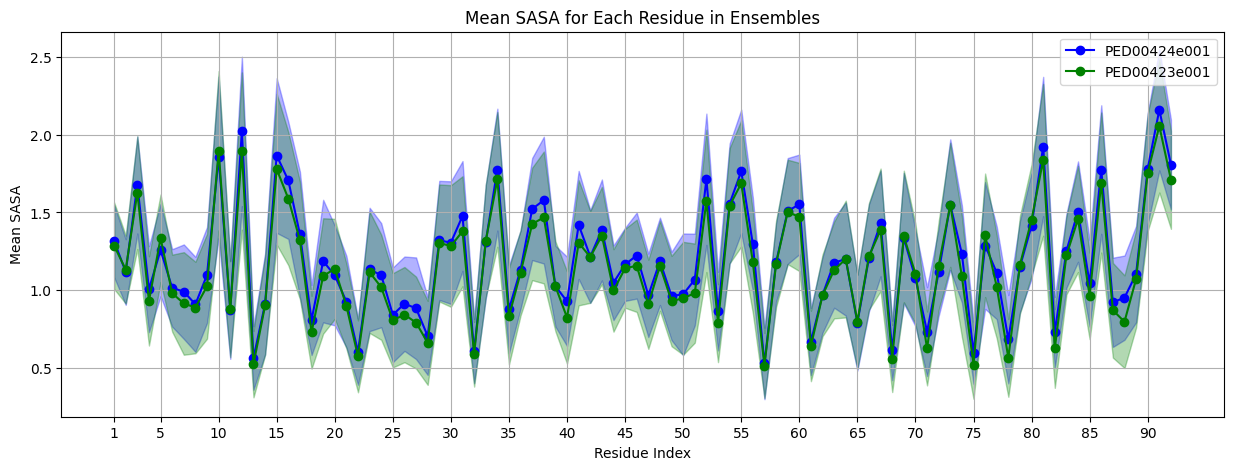

In [17]:
vis.per_residue_mean_sasa()

# Ensemble: PED00424e001
features: (1000, 4095)
distance matrix: (92, 92)
# Ensemble: PED00423e001
features: (1000, 4095)
distance matrix: (92, 92)


array([[<Axes: title={'center': 'CA'}>, <Axes: title={'center': 'COM'}>],
       [<Axes: title={'center': 'CA'}>, <Axes: title={'center': 'COM'}>]],
      dtype=object)

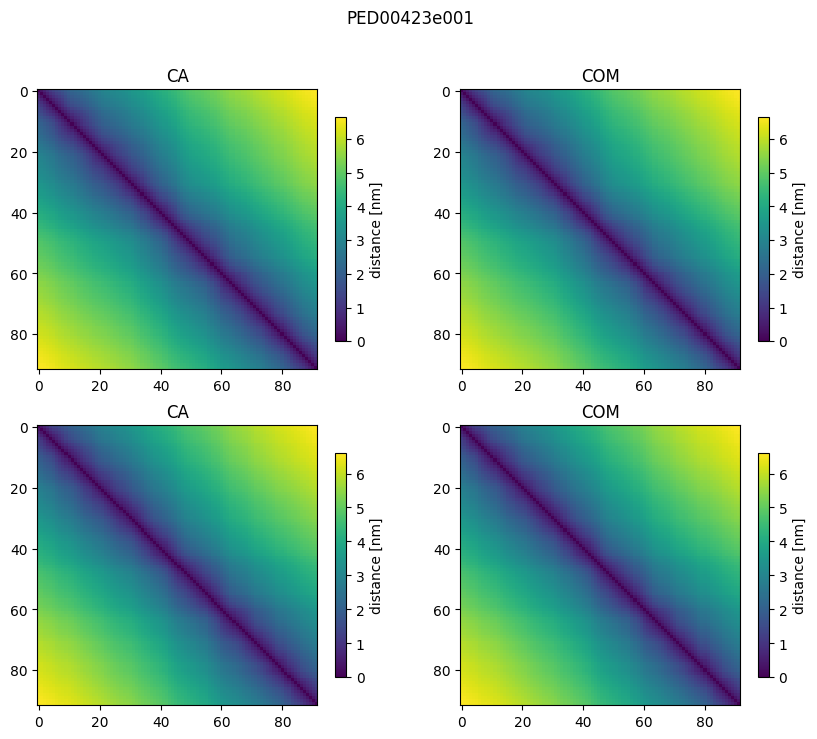

In [4]:
vis.ca_com_distances(min_sep=2)

array([<Axes: title={'center': 'Ramachandran Plot for cluster PED00424e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00423e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>],
      dtype=object)

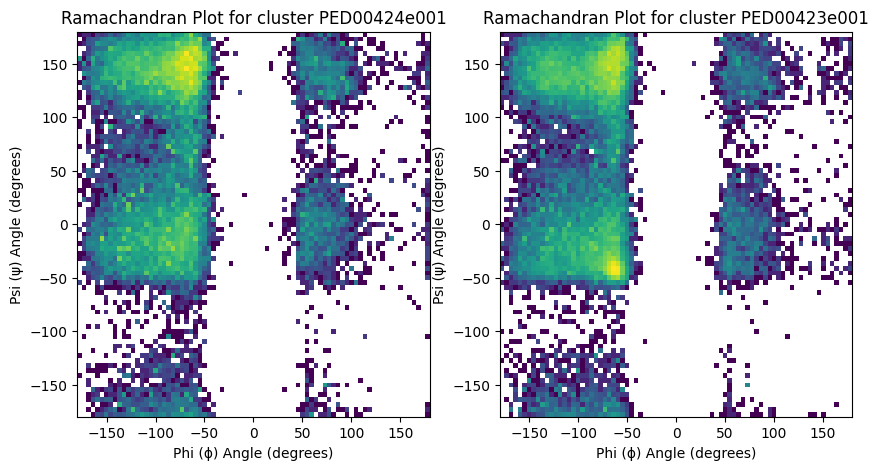

In [14]:
vis.ramachandran_plots(two_d_hist=True)

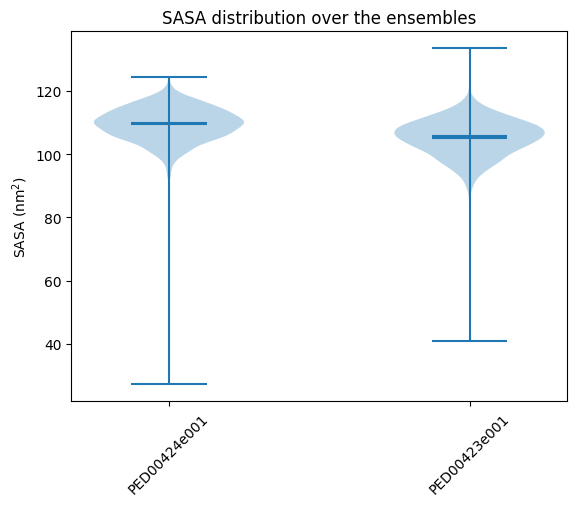

In [20]:
ax_ =vis.ensemble_sasa()